In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

from function import *

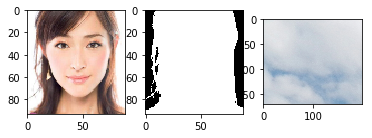

In [2]:
img_target = cv2.cvtColor(cv2.imread('./ignore/building2.jpg'), cv2.COLOR_BGR2RGB).astype(np.uint8)
img_target = cv2.resize(img_target, (0,0), fx=0.3, fy=0.3)

img_source = cv2.cvtColor(cv2.imread('./ignore/face.JPG'), cv2.COLOR_BGR2RGB).astype(np.uint8)
img_source = cv2.resize(img_source, (0,0), fx=0.3, fy=0.3)

img_mask = auto_mask(img_source)

plt.subplot(1, 3, 1)
plt.imshow(img_source)

plt.subplot(1, 3, 2)
plt.imshow(img_mask)

plt.subplot(1, 3, 3)
plt.imshow(img_target)

plt.show()

color_0
color_1
color_2
finish_0


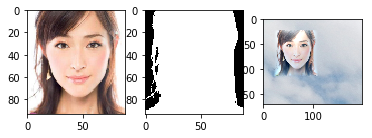

In [3]:
w, h, color = img_source.shape
offset_x, offset_y = int(w * 0.25), int(h * 0.25)

num_iter = 1
N = 1 + 1 + num_iter

plt.subplot(1, N, 1)
plt.imshow(img_source)

plt.subplot(1, N, 2)
plt.imshow(img_mask)

for i in range(num_iter):
    
    ans = np.zeros(img_source.shape, np.uint8)
    for idx_color in range(color):
    
        target = img_target[offset_x: w + offset_x, offset_y: h + offset_y, idx_color] #取出一個色域
        source = img_source[0: w, 0: h, idx_color] #取出一個色域
        mask = img_target[0: w, 0: h, idx_color]
        source_div = divergence(source)
        ans[:, :, idx_color] = solve_image_2(target, source_div, mask)
        print("color_" + str(idx_color))
        
    img_source = ans
    print("finish_" + str(i))

    plt.subplot(1, N, 3+i)
    img_target[offset_x: w + offset_x, offset_y: h + offset_y, :] = ans
    plt.imshow(img_target)

plt.show()